# Homework Instructions

This homework exercise is meant to give you exposure and practice using libraries that we will use often in this course.  It is not meant to teach you anything new, but rather to give you practice and remind you how many of these functions work.  Completing it will mostly require knowledge of **pandas**, **numpy**, and **matplotlib**, which are the core packages required for our data preparation.  As such, you are free to use any of the official support documentation from any of these packages (official support would be linked from their websites.)

The goal with this training exercise will be to produce visualizations of real-time COVID-19 data that is being provided by usafacts.org (which is where the CDC gets their numbers).  Here we want to use pandas ability to recognize and treat dates appropriately, since we'll be using those dates as the x-axes on our plots in order to see how covid has varied with time.

The overall structure of this COVID training project is to:
>1.  Read in and transform the data from the online repository
>>1a.  Make a plot of the COVID cases per county for several different counties to illustrate how comparing cumulative data can be misleading
>2.  Calculate rate of increase per day, normalized to the county; and compute a running average of cases
>>2a.  make plots that take a random draw of counties and plots their normalized cases over time
>3a.  (Optional) Compute higher order time derivatives of the plots to make a predictive model

This notebook and assignment are focused on step 1, reading, transforming, and visualizing the data in different ways.  
The tasks for you in this notebook are in the form of **Exercises** which require you to produce code/plots/answers.  **You will be assessed on your responses to these exercises.  Please be sure to comment your code so that it leaves no question for me about what you did or why.  All plots that are created in exercises should be fully labelled, sized, and have approprately located legends.**

There are several optional Mastery Level questions in this notebook.  If you do not want the challenge, feel free to skip them without penalty.  Complete/correct solutions to these questions will earn a modest amount of extra credit at the end of the semester.  As you progress through your training in this course, I encourage you to try and tackle some of these advanced programming tasks to further your own knowledge and abilities.

We are going to use the pandas package to read in and store the data.  pandas is useful for when the data in your arrays is not entirely numerical you can go to the webURL https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/ to see where we're obtaining the data for this analysis.



---


The following cell contains all of my package and library imports; whether I use all of these libraries doesn't really matter.  I'm putting here anything that I think I *might* use.  You can think of this first cell as your toolbox for solving the problems that this notebook poses.

# Import and Setup

In [212]:
%reset -f
# this is a reset command that resets all of your variables and values though
# it's not really required when using Collab, it's a good habit to put one of
# these at the beginning of all of your programs for when you need to run it
# from scratch; it effectively does the same thing as resetting the kernel
# but kernel resets should be used more for debugging


In [213]:

import csv # csv is a library that allows python to recognized Comma Separated
  # Value files, which are arrays that store data in a particularly common
  # format that we will be reading
import pandas as pd  # pandas is a special package that is designed to store
  # and manipulate data in arrays very quickly and efficiently
import numpy as np  # good ol' numpy for all its array goodness
import datetime   # this is a special function that will allow us to translate
  # the dates in the file, which are normally just read as numbers, into dates
  # that can be read and understood by the program as times
import matplotlib.pyplot as plt   # for access to plotting tools

# these options I'm setting to control the output rows we display in the
# notebook; since the dataset is much larger than we should ever display all
# at once, we can control how many rows are output with a command like this
pd.set_option('display.min_rows', 12)
pd.set_option('display.max_rows', 30)

#Data Retrieval

---

The following cell retrieves the COVID-19 data from a URL.   You should go to this URL to see what the data looks like before reading it into this notebook.   

When reading in data from a table using pandas, there are special read functions to handle files that are in various formats;  the format of the COVID data we're looking at is **_csv_** which is the default output from excel spreadsheets; **_csv_** stands for "comma separated values" meaning that every element in the array is separated by a comma by default.  Also by default, the pandas function **_read_csv_** will assume that the first line in the file is the **header** information describing the columns in the data file.  

As we will see, the actual **header** in our datafile contains note only information that we want as data descriptors, but it also contains dates which are actual data we want to store and work with, not just keep as header information.  Since the header contains data we need, and the default for the read function expects a header row, then we need to tell the read runction not to read it in as a normal header, so we set the option (header=None) in the function argument, after the URL.   We're also going to read in the data normally, because the header does actually contain header information, in addition to the dates we need.

Each object that we create below (cases, cases_h, pop, and deaths) can be thought of as an array, but it is more precisely a **PANDAS DATAFRAME**; a dataframe is like an array with extra information and structure that pandas uses to speed up all operations we do with that array.  Throughout this example, I will refer to our data as a dataframe, but for visualizing the data in your mind, it is effectively the same thing as a 2D array.

In [214]:
# here i'm reading in the data without the header
# this file contains the number of cases over time separated by county,
# which is the data I'm going to start with

# this is an option that may need set in order for the web scrape to not be rejected
s_o = {'User-Agent': 'Mozilla/5.0'}
# the url for covid cases
cases_url = 'https://static.usafacts.org/public/data/covid-19/covid_confirmed_usafacts.csv'

# for data without the header
# the low memory flag is because the data file contains mixed type data
cases = pd.read_csv(cases_url, storage_options=s_o, header=None, low_memory=False)

In [215]:
# here i'm reading in the data with the header; though we will be working
# primarily with the cases dataframe, which does not contain the formatted
# header info, we will also be using cases_h at some point to take advantage
# of how Pandas stores date and time info (you'll see why I'm doing this later)
# ; since I'm reading the header info as data, and some of that information
# is dates, I'm putting in a special option so that it doesn't think those
# are just numbers (parse_dates=True)
cases_h = pd.read_csv(cases_url, storage_options=s_o, parse_dates=True)
# for data with the header and parsing the dates contained in the header

The above data retrieval calls are meant to access the most current, up to date information which is updated daily.  So, any subsequent use of this notebook will retrieve all of the available data up to the most recent.  It's important to note that, in general, formats often do change and, in that case, the code will need modified.



---



The following calls retrieve both population data and deaths and store those in data frames.  Similar to the cases data, the header requires special treatment here.  Since we will use the scraped header from the cases data in order to get the dates, we do not require the headers here.


In [216]:
pop_url = 'https://static.usafacts.org/public/data/covid-19/covid_county_population_usafacts.csv'

pop = pd.read_csv(pop_url, storage_options=s_o, low_memory=False)

deaths_url = 'https://static.usafacts.org/public/data/covid-19/covid_deaths_usafacts.csv'

deaths = pd.read_csv(deaths_url, storage_options=s_o, header=None, low_memory=False)

Now that we have the dataframes, we should examine their structure and explore what type of data they contain

In [217]:
np.shape(cases) # here is the shape of the dataframe that we created; the format
# is (rows, columns) there should be around 3194 rows (1 for each county in
# the US), and some number of columns in the thousands, which is the number
# of days since data collection began

(3194, 1269)

In [218]:
cases # uncomment if you want to see the dataframe

,0,1,2,3,4,5,6,7,8,9,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268
0,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
1,0,Statewide Unallocated,AL,01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1001,Autauga County,AL,01,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
3,1003,Baldwin County,AL,01,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
4,1005,Barbour County,AL,01,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
5,1007,Bibb County,AL,01,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56035,Sublette County,WY,56,0,0,0,0,0,0,...,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347
3189,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,12645,12645,12645,12645,12645,12645,12645,12645,12645,12645
3190,56039,Teton County,WY,56,0,0,0,0,0,0,...,12206,12206,12206,12206,12206,12206,12206,12206,12206,12206


In the above dataframe, we can see the structure of the data.  The first row in the dataframe, which contanis header information, also contains date information, starting on Jan. 22, 2020 through the summer of 2023, when regular collection of COVID data stopped.  The fact that useful data (dates) is contained in the header is something which will need attended to.

The primary features in the data are:
```markdown
countyFIPS - a unique numerical identifier code for each county
County Name - there may be duplicate county names in different states
State - Two letter postal abbreviation for state
StateFIPS - unique numerical identifier for state (includes some non-state regions)
Dates - in the format YYYY-MM-DD
```
The array is then populated with the running total of each value (cases and deaths), or just the total population, measured for each county.

In [219]:
cases_h  # here you can see the dataframe with the original header intact
# note that the dates themselves are contained as header entries

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,18872,18872,18872,18872,18872,18872,18872,18872,18872,18872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,56035,Sublette County,WY,56,0,0,0,0,0,0,...,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,12645,12645,12645,12645,12645,12645,12645,12645,12645,12645
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,12206,12206,12206,12206,12206,12206,12206,12206,12206,12206


In [220]:
np.shape(cases_h)   # notice also that cases_h, the dataframe that read the
# header information and kept it in the header, rather than moving the header
# info into the array, has one fewer row than the cases dataframe

(3193, 1269)

In [221]:
np.shape(cases)

(3194, 1269)

It might seem straightforward to use the county name to access a specific county's data, so let's try that

In [222]:
cases_h['County Name'] == 'Baldwin County'
# if this worked as it should have, the third record here should be true

0       False
1       False
2       False
3       False
4       False
5       False
        ...  
3187    False
3188    False
3189    False
3190    False
3191    False
3192    False
Name: County Name, Length: 3193, dtype: bool


#Exercise 1: A question about the 'County Name' feature
What was wrong with the above cell which tried to see whether a specific county in the data could be called?  

What is the solution to this particular problem going forward?

How can we make a change to our dataframe in order for the statement to work as written?

cases_h['County Name'] == 'Baldwin County'

In [223]:
#Enter your solution here
cases_h['County Name'] = cases_h['County Name'].str.strip() #stripped the county name column of any extra space
#in case there was extra space in the table that wouldn't show up when I called the specific cell

In [224]:
cases_h['County Name'] == 'Baldwin County' #Value now displays "True" when I call 'Baldwin County'

0       False
1       False
2        True
3       False
4       False
5       False
        ...  
3187    False
3188    False
3189    False
3190    False
3191    False
3192    False
Name: County Name, Length: 3193, dtype: bool

# County Level Data

Since each row is a different county, one can access data for a specific county
by selecting a full row; in a pandas dataframe, a full row is not just the index of the row, it is a range.  So writing cases[107:108] will show me all of index 107 for this pandas dataframe, which is Maricopa County in Arizona

In [225]:
# if you want to print a range of cases using the dataframe with no header
cases[106:112]


,0,1,2,3,4,5,6,7,8,9,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268
106,4012,La Paz County,AZ,04,0,0,0,0,0,0,...,6161,6161,6161,6161,6161,6161,6161,6161,6161,6161
107,4013,Maricopa County,AZ,04,0,0,0,0,1,1,...,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756
108,4015,Mohave County,AZ,04,0,0,0,0,0,0,...,68398,68398,68398,68398,68398,68398,68398,68398,68398,68398
109,4017,Navajo County,AZ,04,0,0,0,0,0,0,...,49652,49652,49652,49652,49652,49652,49652,49652,49652,49652
110,4019,Pima County,AZ,04,0,0,0,0,0,0,...,325955,325955,325955,325955,325955,325955,325955,325955,325955,325955
111,4021,Pinal County,AZ,04,0,0,0,0,0,0,...,158952,158952,158952,158952,158952,158952,158952,158952,158952,158952


In [226]:
cases[107:108] # if you want to see just one record

,0,1,2,3,4,5,6,7,8,9,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268
107,4013,Maricopa County,AZ,04,0,0,0,0,1,1,...,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756


In [227]:
# We can also use the loc function
temp = cases_h.loc[cases_h['County Name']=='Maricopa County']  #
temp

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
106,4013,Maricopa County,AZ,4,0,0,0,0,1,1,...,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756


The above shows two methods for acessing the county level data, by either using the headerless pandas dataframe and locating the specific row number (or countyFIPS), or alternatively using the dataframe with a header along with the loc function.

**Since the county names are not unique, it is more pratical to use the countyFIPS to uniquely identify a county.**


---

Next we'll look at preparing the data for further analysis

# Exercise 2: Transforming the dataframe

The format of the cases and deaths dataframes contain time series data in columns and different counties in rows.   **The default format for time-series data that pandas expects to have is with each different time in rows, then different counties in columns.**   So our first task is to reshape our input dataframe by interchanging the xy axes, or essentially just swapping our rows and columns.

**Exercise: Find and utilize an appropriate pandas function that will accomplish this task**

In [228]:
#Enter your solution here
t_cases = cases.T #Used .T function to swap the rows and columns in the t_cases dataframe
t_cases

,0,1,2,3,4,5,6,7,8,9,...,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193
0,countyFIPS,0,1001,1003,1005,1007,1009,1011,1013,1015,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
1,County Name,Statewide Unallocated,Autauga County,Baldwin County,Barbour County,Bibb County,Blount County,Bullock County,Butler County,Calhoun County,...,Niobrara County,Park County,Platte County,Sheridan County,Sublette County,Sweetwater County,Teton County,Uinta County,Washakie County,Weston County
2,State,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
3,StateFIPS,01,01,01,01,01,01,01,01,01,...,56,56,56,56,56,56,56,56,56,56
4,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2023-07-18,0,19913,70521,7582,8149,18872,3057,6617,41931,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914
1264,2023-07-19,0,19913,70521,7582,8149,18872,3057,6617,41931,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914
1265,2023-07-20,0,19913,70521,7582,8149,18872,3057,6617,41931,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914


In [229]:
t_deaths = deaths.T #Used .T function to swap the rows and columns in the t_deaths dataframe
t_deaths

,0,1,2,3,4,5,6,7,8,9,...,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193
0,countyFIPS,0,1001,1003,1005,1007,1009,1011,1013,1015,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
1,County Name,Statewide Unallocated,Autauga County,Baldwin County,Barbour County,Bibb County,Blount County,Bullock County,Butler County,Calhoun County,...,Niobrara County,Park County,Platte County,Sheridan County,Sublette County,Sweetwater County,Teton County,Uinta County,Washakie County,Weston County
2,State,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
3,StateFIPS,01,01,01,01,01,01,01,01,01,...,56,56,56,56,56,56,56,56,56,56
4,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2023-07-18,0,235,731,104,111,261,54,132,683,...,12,154,46,92,28,142,16,43,51,24
1264,2023-07-19,0,235,731,104,111,261,54,132,683,...,12,154,46,92,28,142,16,43,51,24
1265,2023-07-20,0,235,731,104,111,261,54,132,683,...,12,154,46,92,28,142,16,43,51,24


## Mastery Level Question
Create a new dataframe that has the desired format (interchanging all of the rows and columns so that the header is in the first column, and all of the counties are the other columns) using the pandas function
[pivot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html)

*note, answering this may alter how some subsequent cells function so consider what other changes may need made later on

In [230]:
# Enter your master level answer here



---

# Extracting and Converting the dates

Now that the structure of the array is what pandas wants (dates in rows, counties in columns), we need to let pandas know that the rows now contain dates which should be treated different than numbers

In [231]:
# the first 4 rows in our transposed dataframe are just header information
# the data is all contained after row 4 and can be selected by county

# for all of the data I'm going to plot, I'll want the same range of dates
# so here's how I isolate those into a list I'm calling 'dates'

dates = pd.to_datetime(t_cases[0][4:])
# a couple of things here:
# "to_datetime" is a pandas function that converts the input
# into a time-like object that pandas can easily read/manipulate;
# t_cases[0][4:] is a slice through the array so that it only displays a subset
# of the data; in this case, I'm selecting [0] for the first index,
# meaning the first column in the dataframe t_cases,
# and [4:] to say that I want to start with the 4th index (meaning the fifth
# row) and then read all of those values as dates;
# so in summary, I'm picking out just the dates from the first column

In [232]:
t_cases[0][4:]  # here is what the subset of the dataframe looks like with the selection [0][4:] that I made above

4       2020-01-22
5       2020-01-23
6       2020-01-24
7       2020-01-25
8       2020-01-26
9       2020-01-27
           ...    
1263    2023-07-18
1264    2023-07-19
1265    2023-07-20
1266    2023-07-21
1267    2023-07-22
1268    2023-07-23
Name: 0, Length: 1265, dtype: object

Notice that originally the datatype was object



In [233]:
dates

4      2020-01-22
5      2020-01-23
6      2020-01-24
7      2020-01-25
8      2020-01-26
9      2020-01-27
          ...    
1263   2023-07-18
1264   2023-07-19
1265   2023-07-20
1266   2023-07-21
1267   2023-07-22
1268   2023-07-23
Name: 0, Length: 1265, dtype: datetime64[ns]

and here is what pandas sees now that we've told it to interpret those as dates.
Notice that the information is the same, but the datatype (dtype) has now changed from an 'object' to 'datetime64', which is the special time format that pandas uses.

#Preparing a new data frame for plotting

Now, our goal with this notebook is to use the covid cumulative cases and cumulative deaths datasets to make plots for individual counties over time.
Eventually, this notebook should take an arbitrary number of counties that we define, compute the per-capita total COVID cases (and deaths), and plot those all together over the same time range.  

## Things to consider

To begin, we will just worry about plotting any single county.  Ultimately we will want to add several counties per plot which isn't too much of an extension because if we can plot one county, we can plot n-counties.

In order to make this plot with Pandas, we have to recognize that the format the data was read in, is not the format Pandas prefers.  Pandas and all its time functionality seem built around the idea of the time series being all in one column.

Our situation was complicated by the fact that some of the data (namely the dates), were being stored in the header, rather than in the frame itself.

To get around this, we've used the read_csv method to put the header information into the dataframe itself, rather than just in the header, and transposed that dataframe so that the dates are now in the first column.

In extracting the data for a county, it will ultimately be easier to reorganize, or recreate our dataframe so that it only has a "date" column, and a value column.  So, let's do that.  


#Exercise 3: Making a new cases dataframe and plot the data for Maricopa county

Exercise:  Create a new dataframe with the following features:
```
it should have dates (dtype: datetime) as rows in the first column
it should have county_FIPS (dtype: int) a unique identifier for each county) as columns in the first row
it should have the values (dtype: int) for each county and each date in the rest of the array.
```
and use that dataframe to create a plot of the cumulative cases vs. time for Maricopa county

In [234]:
# enter your solution code here; show your plot and show that the resulting dataframe matches the requirements
values = t_cases[3:][1:]#Trimming first 3 rows of data in the t_cases dataframe
values

,0,1,2,3,4,5,6,7,8,9,...,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193
4,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2023-07-18,0,19913,70521,7582,8149,18872,3057,6617,41931,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914
1264,2023-07-19,0,19913,70521,7582,8149,18872,3057,6617,41931,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914
1265,2023-07-20,0,19913,70521,7582,8149,18872,3057,6617,41931,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914


In [235]:
columns_to_drop = [0,1]#trimming the first couple of columns from the previous values output
values = values.drop(columns=columns_to_drop)
values

,2,3,4,5,6,7,8,9,10,11,...,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,19913,70521,7582,8149,18872,3057,6617,41931,10935,6803,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914
1264,19913,70521,7582,8149,18872,3057,6617,41931,10935,6803,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914
1265,19913,70521,7582,8149,18872,3057,6617,41931,10935,6803,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914


In [236]:
values = values.apply(pd.to_numeric, errors='coerce').astype('int64')#converting values into integer form
#from object form

In [274]:
county_FIPS = t_cases.iloc[0, 2:].tolist()#creating a list of the county FIPS

In [238]:
countycases_df = pd.DataFrame(data=values.values, columns=county_FIPS, index=dates)
countycases_df#created new dataframe from the elements listed above

,1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-18,19913,70521,7582,8149,18872,3057,6617,41931,10935,6803,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914
2023-07-19,19913,70521,7582,8149,18872,3057,6617,41931,10935,6803,...,868,7852,2313,10125,2347,12645,12206,6468,2640,1914


In [239]:
Maricopa_df = countycases_df.iloc[:,[105]]
Maricopa_df#extracting specific data for Maricopa county

,4013
0,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,1
2020-01-27,1
...,...
2023-07-18,1552756
2023-07-19,1552756


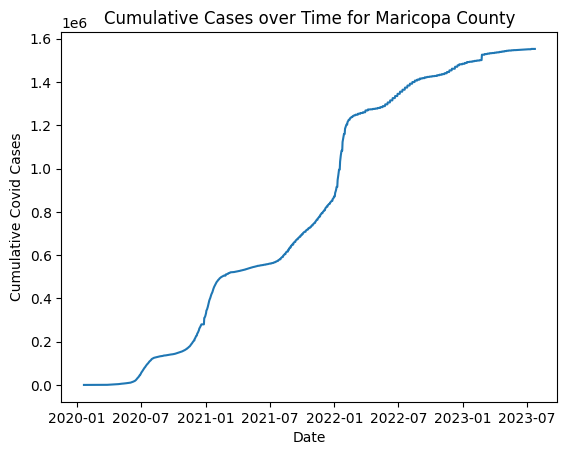

In [240]:
x_values = np.array(dates)  #dates for the X axis
y_values = np.array(Maricopa_df)  #Maricopa covid cases for the Y axis

plt.plot(x_values, y_values)#creating plot
plt.xlabel('Date')
plt.ylabel('Cumulative Covid Cases')
plt.title('Cumulative Cases over Time for Maricopa County')
plt.show()

# Exercise 4: Making new deaths and population dataframes

Prepare the cumulative Deaths data in the same way you prepared cases, and create a new deaths dataframe with that same structure and use that dataframe to create a plot of the cumulative cases vs. time for Maricopa county.


Prepare the population data so that it has the same structure as Deaths and Cases, though this dataset does not contain any time-varying numbers, just the total population for each county, and we have included the header.

In [241]:
# enter your solution code here; show your plot and show that the resulting dataframes match the requirements
d_values = t_deaths[3:][1:]#Trimming first 3 rows of data in the t_deaths dataframe
d_values

,0,1,2,3,4,5,6,7,8,9,...,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193
4,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,2023-07-18,0,235,731,104,111,261,54,132,683,...,12,154,46,92,28,142,16,43,51,24
1264,2023-07-19,0,235,731,104,111,261,54,132,683,...,12,154,46,92,28,142,16,43,51,24
1265,2023-07-20,0,235,731,104,111,261,54,132,683,...,12,154,46,92,28,142,16,43,51,24


In [242]:
columns_to_drop_deaths = [0,1]#trimming the first couple of columns from the previous values output
d_values=d_values.drop(columns=columns_to_drop_deaths, axis=1)
d_values

,2,3,4,5,6,7,8,9,10,11,...,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1263,235,731,104,111,261,54,132,683,172,89,...,12,154,46,92,28,142,16,43,51,24
1264,235,731,104,111,261,54,132,683,172,89,...,12,154,46,92,28,142,16,43,51,24
1265,235,731,104,111,261,54,132,683,172,89,...,12,154,46,92,28,142,16,43,51,24


In [243]:
d_values = d_values.apply(pd.to_numeric, errors='coerce').astype('int64')#converting the values into integer form
#from object form

In [244]:
d_fipsID = t_deaths.iloc[0, 2:].tolist()#creating a list of the county FIPS

In [245]:
countydeaths_df = pd.DataFrame(data=d_values.values, columns=d_fipsID, index=dates)
countydeaths_df#created new dataframe from the elements listed above

,1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-18,235,731,104,111,261,54,132,683,172,89,...,12,154,46,92,28,142,16,43,51,24
2023-07-19,235,731,104,111,261,54,132,683,172,89,...,12,154,46,92,28,142,16,43,51,24


In [246]:
Maricopa_deaths_df = countydeaths_df.iloc[:,[105]]
Maricopa_deaths_df#extracting specific data for Maricopa county from countydeaths.df

,4013
0,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0
...,...
2023-07-18,17103
2023-07-19,17103


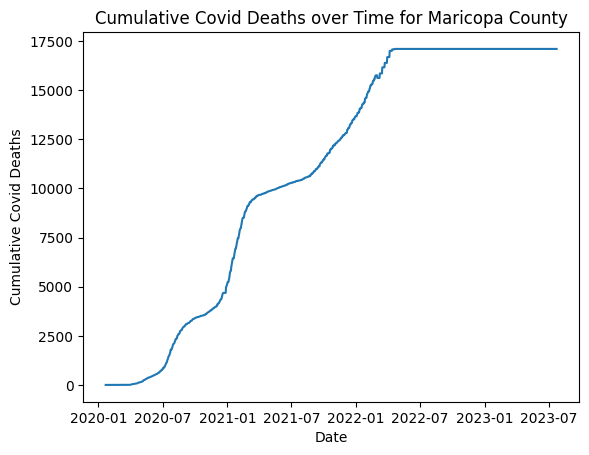

In [247]:
x_values = np.array(dates)  #dates as the X axis
y_values = np.array(Maricopa_deaths_df)  #deaths in Maricopa county in the Y axis

plt.plot(x_values, y_values)
plt.xlabel('Date')
plt.ylabel('Cumulative Covid Deaths')
plt.title('Cumulative Covid Deaths over Time for Maricopa County')
plt.show()

In [275]:
pop_df2 = pop.T.drop(pop.T.index[[1,2]])#dropping the county name and state rows in original population dataframe
NEW_pop_df = pop_df2.drop(pop_df2.columns[0], axis=1)#dropping the first column in the oringinal dataframe
NEW_pop_df

,1,2,3,4,5,6,7,8,9,10,...,3185,3186,3187,3188,3189,3190,3191,3192,3193,3194
countyFIPS,1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
population,55869,223234,24686,22394,57826,10101,19448,113605,33254,26196,...,2356,29194,8393,30485,9831,42343,23464,20226,7805,6927


In [278]:
pop_values = pop['population'][1:]#making a list of county populations from original pop dataframe
pop_values

1        55869
2       223234
3        24686
4        22394
5        57826
6        10101
         ...  
3189      9831
3190     42343
3191     23464
3192     20226
3193      7805
3194      6927
Name: population, Length: 3194, dtype: int64

In [277]:
FIPS = pop['countyFIPS'][1:]#making a list of county FIPS from original pop dataframe
FIPS

1        1001
2        1003
3        1005
4        1007
5        1009
6        1011
        ...  
3189    56035
3190    56037
3191    56039
3192    56041
3193    56043
3194    56045
Name: countyFIPS, Length: 3194, dtype: int64

In [252]:
population_df = pd.DataFrame(data=pop_values.values, index= FIPS)#creating new population df using above factors
P = population_df.T
P

countyFIPS,1001,1003,1005,1007,1009,1011,1013,1015,1017,1019,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,55869,223234,24686,22394,57826,10101,19448,113605,33254,26196,...,2356,29194,8393,30485,9831,42343,23464,20226,7805,6927


#Quickly selecting arbitrary counties

In [253]:
# to select a specific county for plotting, we can use the county id number
# (countyFIPS), which we have stored in the cases dataframe; or the county name,
# which we stored elsewhere this is where our original storage of the header
# information (cases_h) comes in handy

# I can use that dataframe with the original header to match up which county
# corresponds to which county ID so, if I wanted the ID for Maricopa county,
# I could type
cases_h.loc[cases_h['County Name']=='Maricopa County']

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
106,4013,Maricopa County,AZ,4,0,0,0,0,1,1,...,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756,1552756


One problem this presents is that, some states have counties with the same names (like Adams county for instance)

In [279]:
padlist=cases_h.loc[cases_h['County Name']=='Adams County']
padlist # uncomment this to see what I mean

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
250,8001,Adams County,CO,8,0,0,0,0,0,0,...,168289,168289,168289,168289,168289,168289,168289,168289,168289,168289
565,16003,Adams County,ID,16,0,0,0,0,0,0,...,828,828,828,828,828,828,828,828,828,828
609,17001,Adams County,IL,17,0,0,0,0,0,0,...,26914,26914,26914,26914,26914,26914,26914,26914,26914,26914
712,18001,Adams County,IN,18,0,0,0,0,0,0,...,7602,7602,7602,7602,7602,7602,7602,7602,7602,7602
806,19003,Adams County,IA,19,0,0,0,0,0,0,...,931,931,931,931,931,931,931,931,931,931
1426,28001,Adams County,MS,28,0,0,0,0,0,0,...,8703,8703,8703,8703,8703,8703,8703,8703,8703,8703
1682,31001,Adams County,NE,31,0,0,0,0,0,0,...,6499,6499,6499,6499,6499,6499,6499,6499,6499,6499
2025,38001,Adams County,ND,38,0,0,0,0,0,0,...,703,703,703,703,703,703,703,703,703,703
2079,39001,Adams County,OH,39,0,0,0,0,0,0,...,9012,9012,9012,9012,9012,9012,9012,9012,9012,9012
2283,42001,Adams County,PA,42,0,0,0,0,0,0,...,32070,32070,32070,32070,32070,32070,32070,32070,32070,32070


We could further refine this call by also specifying the state, which should give us a unique location.

In [255]:
padlist2=padlist.loc[padlist['State']=='PA']
padlist2

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
2283,42001,Adams County,PA,42,0,0,0,0,0,0,...,32070,32070,32070,32070,32070,32070,32070,32070,32070,32070


Since my new dataframes have the counties listed by their FIPS number, I can extract that countyFIPS if I know the county name thusly:

In [256]:
#see how the 2 cells above lead to this?

# an example for a unique county name
t2 = cases_h.loc[cases_h['County Name']=='Maricopa County']

# an example for a duplicate county name with state
#t1 = cases_h.loc[cases_h['County Name']=='Adams County']
#t2 = t1.loc[t1['State']=='PA']

tfips = t2['countyFIPS']  # this stores the county FIPS
tfips

106    4013
Name: countyFIPS, dtype: int64

## some examples of extracting specific counties from our dataframe

In [257]:
n1 = cases_h.loc[cases_h['countyFIPS']==4013] # Maricopa
n2 = cases_h.loc[cases_h['countyFIPS']==53015] # Cowlitz
n3 = cases_h.loc[cases_h['County Name']=='New York County'] # manhatten, 36061
n4 = cases_h.loc[cases_h['countyFIPS']==36085]  #richmond county (staten island)
n5 = cases_h.loc[cases_h['County Name']=='Queens County'] # Queens, 36081
n6 = cases_h.loc[cases_h['countyFIPS']==36047] # Brooklyn

In [258]:
cases_h

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149
5,1009,Blount County,AL,1,0,0,0,0,0,0,...,18872,18872,18872,18872,18872,18872,18872,18872,18872,18872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,56035,Sublette County,WY,56,0,0,0,0,0,0,...,2347,2347,2347,2347,2347,2347,2347,2347,2347,2347
3188,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,12645,12645,12645,12645,12645,12645,12645,12645,12645,12645
3189,56039,Teton County,WY,56,0,0,0,0,0,0,...,12206,12206,12206,12206,12206,12206,12206,12206,12206,12206


#Exercise 5: plotting multiple counties together

Now that you can access specific counties by name or FIPS, I'd like you to compare the cases and deaths for Maricopa county, AZ and Bronx County, NY  (those are FIPS == 4013, and 36005 respectively)

In [280]:
# Enter your solution code here along with the resulting plot that is requested
Maricopa_cases = countycases_df.iloc[:,[105]]#Extracting Maricopa county cases from the New dataframe using the
#column number based on the assigned FIPS score
Maricopa_cases

,4013
0,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,1
2020-01-27,1
...,...
2023-07-18,1552756
2023-07-19,1552756


In [261]:
Bronx_df = countycases_df.iloc[:,[1862]]#Extracting Bronx county cases from the New dataframe using the
#column number based on the assigned FIPS score
Bronx_df

,36005
0,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0
...,...
2023-07-18,516506
2023-07-19,516827


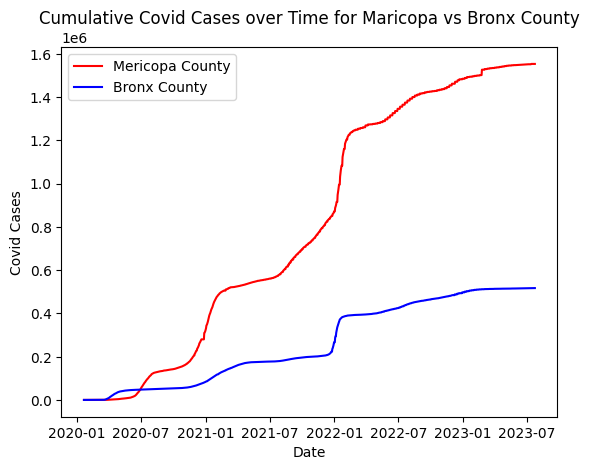

In [262]:
x_values1 = np.array(dates)  #Creating the plot analyzing Maricopa vs. Bronx Covid Cases
y_values1 = np.array(Maricopa_df)

x_values2 = np.array(dates)
y_values2 = np.array(Bronx_df)

plt.plot(x_values1, y_values1, label = 'Mericopa County', color = 'red')
plt.plot(x_values2, y_values2, label = 'Bronx County', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Covid Cases')
plt.title('Cumulative Covid Cases over Time for Maricopa vs Bronx County')
plt.legend()
plt.show()

In [263]:
Maricopa_deaths = countydeaths_df.iloc[:,[105]]#Extracting Maricopa county deaths from the New dataframe using the
#column number based on the assigned FIPS score
Maricopa_deaths

,4013
0,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0
...,...
2023-07-18,17103
2023-07-19,17103


In [264]:
Bronx_deaths = countydeaths_df.iloc[:,[1862]]#Extracting Bronx county deaths from the New dataframe using the
# column number based on the assigned FIPS score
Bronx_deaths

,36005
0,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0
...,...
2023-07-18,8526
2023-07-19,8526


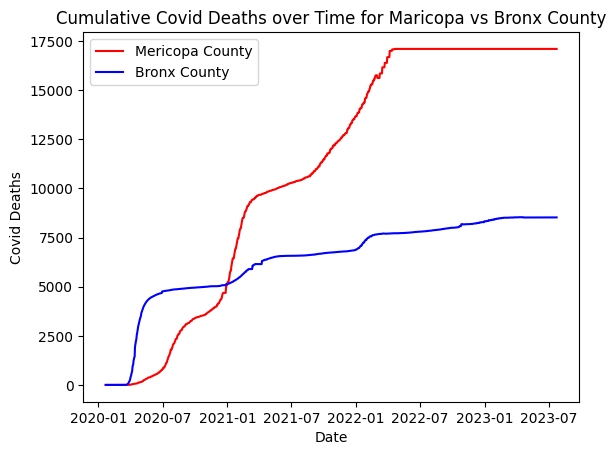

In [265]:
x_values1 = np.array(dates)  #Creating the plot analyzing Maricopa vs. Bronx Covid Deaths
y_values1 = np.array(Maricopa_deaths)

x_values2 = np.array(dates)
y_values2 = np.array(Bronx_deaths)

plt.plot(x_values1, y_values1, label = 'Mericopa County', color = 'red')
plt.plot(x_values2, y_values2, label = 'Bronx County', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Covid Deaths')
plt.title('Cumulative Covid Deaths over Time for Maricopa vs Bronx County')
plt.legend()
plt.show()

#Plotting the per capita values

It would be great to visualize both the deaths and cases on the same plot.Since their values span different orders of magnitude (10^4 for deaths, 10^6 for cases), In order to visualize both the cases and deaths on the same plot, the data needs to have some scaling applied.  

To do a per capita scaling calculation, I need to know the population of each county, which is stored in a different dataframe from the cases data, called 'pop'.

The pop dataframe has headers: countyFIPs, County Name, State, population so to calculate the percapita covid cases, we need to take the total number of cases and divide by the population.

#Exercise 6: Per capita calculation

Using the county level population data, plot the cumulative per capita cases for 6 counties (Maricopa County,  Bronx County, and 4 other counties of your choice).  On a separate figure, plot the per capita deaths for those same counties.

Discuss what you see in these plots you've created.  

In [267]:
maricopa_county_fips = '4013' #identifying all of the FIPS codes for the 6 counties
bronx_county_fips = '36047'#writing them out to make referencing them easier
new_york_county_fips = '36061'
adams_pa_county_fips = '42001'
staten_island_county_fips = '36085'
brooklyn_county_fips = '36047'

In [268]:
maricopa_county_data_d = countydeaths_df[maricopa_county_fips]#using the FIPS codes to extract the deaths and cases
bronx_county_data_d = countydeaths_df[bronx_county_fips]#data that is listed within the existing countycases_df and
maricopa_county_data_c = countycases_df[maricopa_county_fips]#countydeath_df
bronx_county_data_c = countycases_df[bronx_county_fips]
new_york_county_fips_d = countydeaths_df[new_york_county_fips]
new_york_county_fips_c = countycases_df[new_york_county_fips]
adams_pa_county_fips_d = countydeaths_df[adams_pa_county_fips]
adams_pa_county_fips_c = countycases_df[adams_pa_county_fips]
staten_island_county_fips_d = countydeaths_df[staten_island_county_fips]
staten_island_county_fips_c = countycases_df[staten_island_county_fips]
brooklyn_county_fips_d = countydeaths_df[brooklyn_county_fips]
brooklyn_county_fips_c = countycases_df[brooklyn_county_fips]

In [284]:
maricopa_county_pop = P[4013]#extracting the exact populations from the P dataframe by using the county FIPS codes
bronx_county_pop = P[36047]
new_york_county_pop = P[36061]
adams_pa_county_pop = P[42001]
staten_island_county_pop = P[36085]
brooklyn_county_pop = P[36047]

In [285]:
maricopa_per_capita_deaths = maricopa_county_data_d.div(maricopa_county_pop.squeeze(), axis=0)#dividing the county
maricopa_per_capita_cases = maricopa_county_data_c.div(maricopa_county_pop.squeeze(), axis=0)#cases and deaths by
bronx_per_capita_deaths = bronx_county_data_d.div(bronx_county_pop.squeeze(), axis=0)#the county populations
bronx_per_capita_cases = bronx_county_data_c.div(bronx_county_pop.squeeze(), axis=0)
new_york_per_capita_deaths = new_york_county_fips_d.div(new_york_county_pop.squeeze(), axis=0)
new_york_per_capita_cases = new_york_county_fips_c.div(new_york_county_pop.squeeze(), axis=0)
adams_per_capita_deaths = adams_pa_county_fips_d.div(adams_pa_county_pop.squeeze(), axis=0)
adams_per_capita_cases = adams_pa_county_fips_c.div(adams_pa_county_pop.squeeze(), axis=0)
staten_island_capita_deaths = staten_island_county_fips_d.div(staten_island_county_pop.squeeze(), axis=0)
staten_island_capita_cases = staten_island_county_fips_c.div(staten_island_county_pop.squeeze(), axis=0)
brooklyn_per_capita_deaths = brooklyn_county_fips_d.div(brooklyn_county_pop.squeeze(), axis=0)
brooklyn_per_capita_cases = brooklyn_county_fips_c.div(brooklyn_county_pop.squeeze(), axis=0)

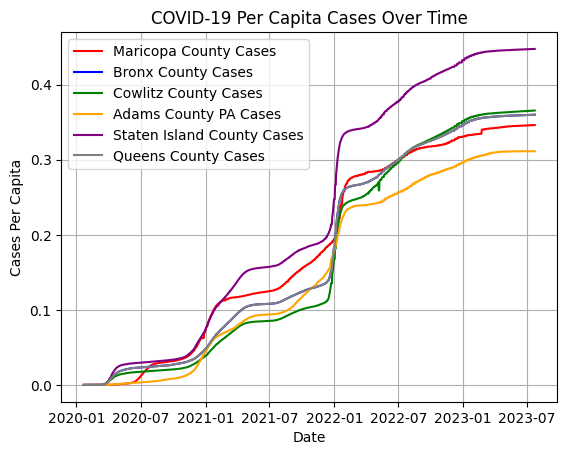

In [286]:
#cases per capita comparisson between 6 counties by plotting the cases per capita on the Y axis and the dates on
#the X axis
plt.plot(maricopa_per_capita_cases.index, maricopa_per_capita_cases.values, label='Maricopa County Cases', color='red')
plt.plot(bronx_per_capita_cases.index, bronx_per_capita_cases.values, label='Bronx County Cases', color='blue')
plt.plot(new_york_per_capita_cases.index, new_york_per_capita_cases.values, label='Cowlitz County Cases', color='green')
plt.plot(adams_per_capita_cases.index, adams_per_capita_cases.values, label='Adams County PA Cases ', color='orange')
plt.plot(staten_island_capita_cases.index, staten_island_capita_cases.values, label='Staten Island County Cases', color='purple')
plt.plot(brooklyn_per_capita_cases.index, brooklyn_per_capita_cases.values, label='Queens County Cases', color='grey')

plt.title('COVID-19 Per Capita Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Cases Per Capita')
plt.legend()
plt.grid(True)
plt.show()

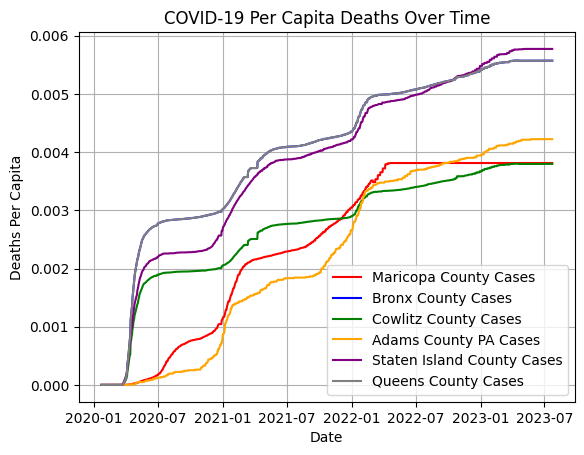

In [287]:
#deaths per capita comparisson between 6 counties by plotting the deaths per capita on the Y axis and the dates on
#the X axis
plt.plot(maricopa_per_capita_deaths.index, maricopa_per_capita_deaths.values, label='Maricopa County Cases', color='red')
plt.plot(bronx_per_capita_deaths.index, bronx_per_capita_deaths.values, label='Bronx County Cases', color='blue')
plt.plot(new_york_per_capita_deaths.index, new_york_per_capita_deaths.values, label='Cowlitz County Cases', color='green')
plt.plot(adams_per_capita_deaths.index, adams_per_capita_deaths.values, label='Adams County PA Cases ', color='orange')
plt.plot(staten_island_capita_deaths.index, staten_island_capita_deaths.values, label='Staten Island County Cases', color='purple')
plt.plot(brooklyn_per_capita_deaths.index, brooklyn_per_capita_deaths.values, label='Queens County Cases', color='grey')

plt.title('COVID-19 Per Capita Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths Per Capita')
plt.legend()
plt.grid(True)
plt.show()

# Mastery Level Question
Write a cell that will prompt and store a list of counties (with states) and convert those to their respective countyFIPS, which will then be used to compare counties against eachother.  You need to demonstrate how this list works in notebook for credit.